In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=1., 
        rc={'figure.figsize':(8,5)})

## Read data

In [2]:
train_070 = pd.read_csv(os.path.join("..", "database_split", "train_0-70.csv"))
val_070 = pd.read_csv(os.path.join("..", "database_split", "val_0-70.csv"))
test_070 = pd.read_csv(os.path.join("..", "database_split", "test_0-70.csv"))

train_70100 = pd.read_csv(os.path.join("..", "database_split", "train_70-100.csv"))
val_70100 = pd.read_csv(os.path.join("..", "database_split", "val_70-100.csv"))
test_70100 = pd.read_csv(os.path.join("..", "database_split", "test_70-100.csv"))

In [3]:
val_070['images'] = 'Validation'
val_070['split'] = "20-70 years"

val_70100['images'] = 'Validation'
val_70100['split'] = ">70 years"
val = pd.concat([val_070, val_70100]).reset_index(drop=True)

test_070['images'] = 'Test'
test_070['split'] = "20-70 years"

test_70100['images'] = 'Test'
test_70100['split'] = ">70 years"
test = pd.concat([test_070, test_70100]).reset_index(drop=True)

val_test = pd.concat([val, test])

/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

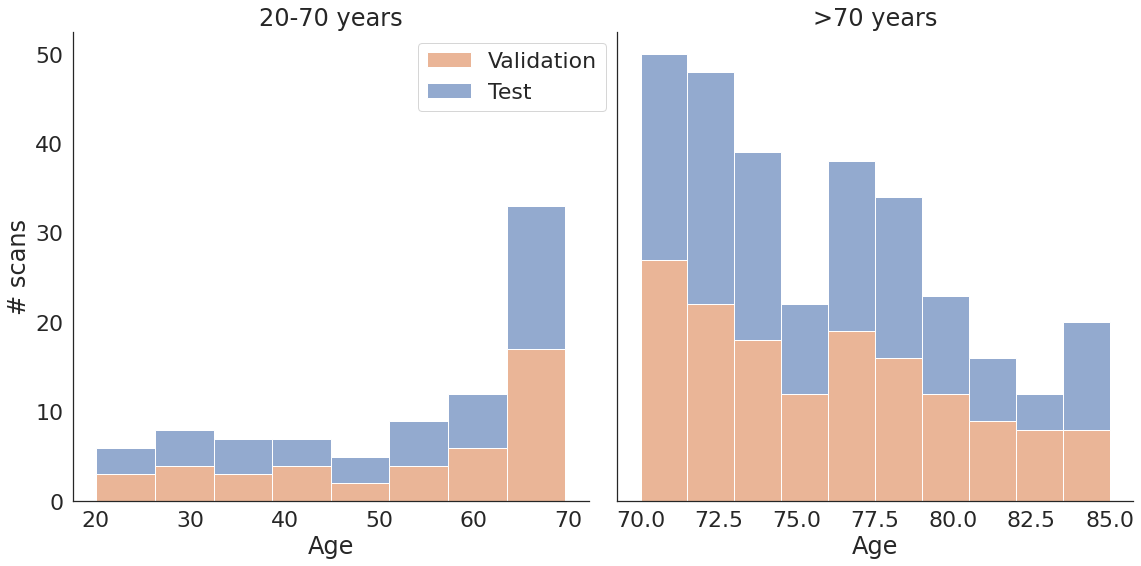

In [4]:
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=2., 
        rc={'figure.figsize':(8,5)})



fig = plt.figure()
g = sns.FacetGrid(val_test, col="split", sharex=False,
                  height=5, size=8,
                #   col_order=["Raw dataset", "Data Augmented dataset"],
                  palette=sns.color_palette('Set2')
                  )
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='images',
                hue_order=['Validation', 'Test'],
                multiple='stack',
                # common_bins=True, bins=21,
                label='Data'
                ) 
g.set_xlabels("Age")
g.set_ylabels("# scans")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Validation', 'Test']
order = [0, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(0, 1))
plt.savefig('Val_test_distribution_070.pdf', bbox_inches='tight', dpi=300)


/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

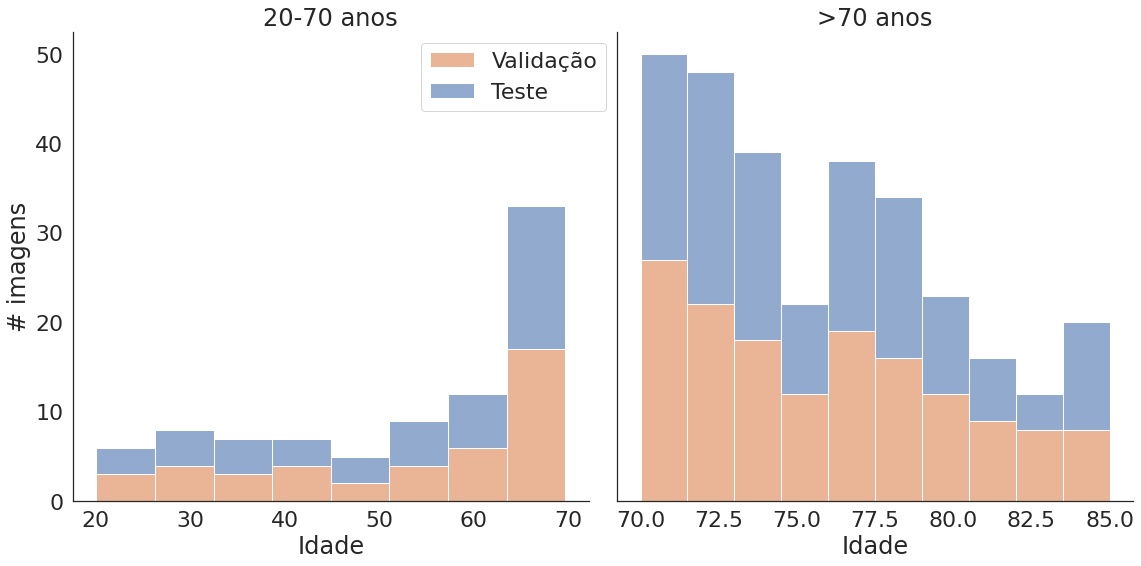

In [5]:
sns.set(context='notebook', style='white',
        font='sans-serif', font_scale=2.,
        rc={'figure.figsize': (8, 5)})

fig = plt.figure()
val_test['split_pt'] = val_test[['split']].apply(
    lambda x: x.replace("20-70 years", "20-70 anos").replace(">70 years", ">70 anos"))

g = sns.FacetGrid(val_test, col="split_pt", sharex=False,
                  height=5, size=8,
                  #   col_order=["Raw dataset", "Data Augmented dataset"],
                  palette=sns.color_palette('Set2')
                  )
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='images',
                hue_order=['Validation', 'Test'],
                multiple='stack',
                # common_bins=True, bins=21,
                label='Data'
                )
g.set_xlabels("Idade")
g.set_ylabels("# imagens")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Validação', 'Teste']
order = [0, 1]
plt.legend([handles[idx] for idx in order], [labels[idx]
                                             for idx in order], bbox_to_anchor=(0, 1))
plt.savefig('Val_test_distribution_070_pt.pdf', bbox_inches='tight', dpi=300)


In [6]:
# Unique train images
unique_070 = train_070.drop_duplicates('Subject ID')
print("0-70 - ", len(unique_070), "unique subjects")
unique_70100 = train_70100.drop_duplicates('Subject ID')
print("70-100 - ", len(unique_70100), "unique subjects")


0-70 -  576 unique subjects
70-100 -  224 unique subjects


In [7]:
train_070['unique'] = 'Longitudinal'
train_070.loc[unique_070.index, 'unique'] = 'Regular'
train_070['split'] = "20-70 years"

train_70100['unique'] = 'Longitudinal'
train_70100.loc[unique_70100.index, 'unique'] = 'Regular'
train_70100['split'] = ">70 years"
train = pd.concat([train_070, train_70100]).reset_index(drop=True)

train['database'] = train['Image Filename'].apply(lambda x: "ADNI" if 'ADNI' in x else 'IXI')

In [8]:
import numpy as np
def generate_dataAugmentation(dt, age_range):
    if age_range[1] == 70:
        th = 300
    else:
        th = 200
    delta = dt['Age'].max() - dt['Age'].min()
    print(delta)
    discrete = pd.cut(dt['Age'], bins=int(delta/3),  # three bins
                      right=False).reset_index(drop=True).astype(str)
    dt['Age_disc'] = discrete.reset_index(drop=True)
    aug_dt = pd.DataFrame()
    for age in dt['Age_disc'].value_counts().keys():
        age_dt = dt[dt['Age_disc'] == age]
        total = len(age_dt['Age_disc'])
        mult = np.ceil((th-total) / total)
        new_dt = pd.concat([age_dt] * int(mult))
        new_dt['unique'] = 'Data Augmentation'
        aug_dt = pd.concat([aug_dt, new_dt])
    return aug_dt

In [9]:
dt_070 = train[train.split == '20-70 years'].reset_index(drop=True)
dt_070['Data'] = 'Raw dataset'
dataAug = generate_dataAugmentation(dt_070, [0,70])
dataAug = pd.concat([dataAug, dt_070])
dataAug['Data'] = 'Data Augmented dataset'
dt = pd.concat([dataAug, dt_070])
# dt.unique.value_counts()

49.92


/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

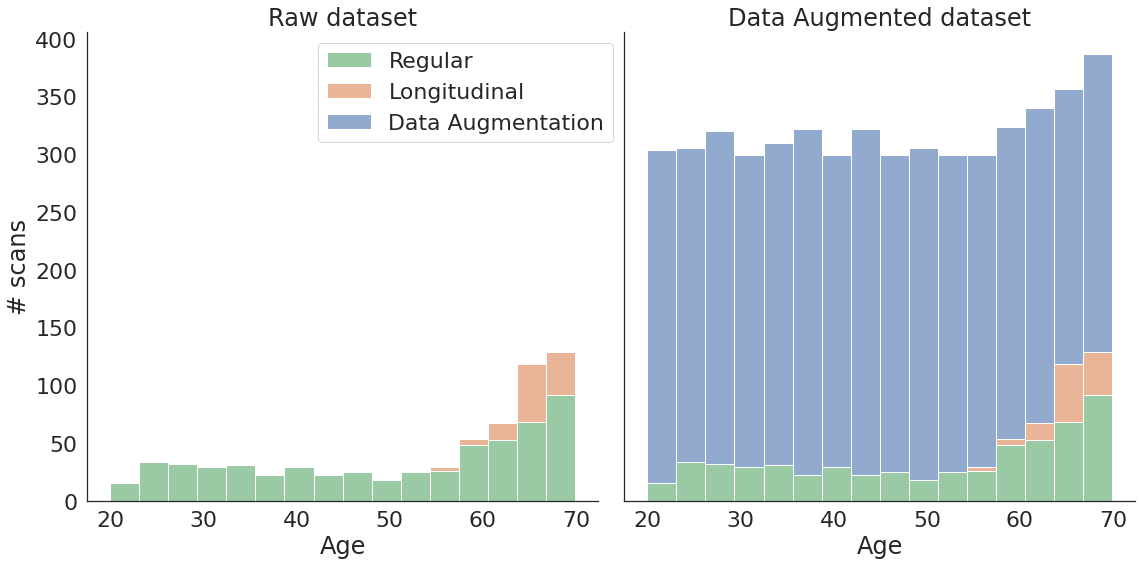

In [10]:
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=2., 
        rc={'figure.figsize':(8,5)})

fig = plt.figure()
g = sns.FacetGrid(dt, col="Data", sharex=True,
                  height=5, size=8,
                  col_order=["Raw dataset", "Data Augmented dataset"],
                  palette=sns.color_palette('Set2')
                  )
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='unique',
                hue_order=['Data Augmentation', 'Longitudinal','Regular'],
                multiple='stack', common_bins=True, bins=16,
                label='Data'
                ) 
g.set_xlabels("Age")
g.set_ylabels("# scans")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Regular', 'Longitudinal', 'Data Augmentation']
order = [0, 1, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(0, 1))
plt.savefig('Data_augmentation_distribution_070.pdf', bbox_inches='tight', dpi=300)


/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

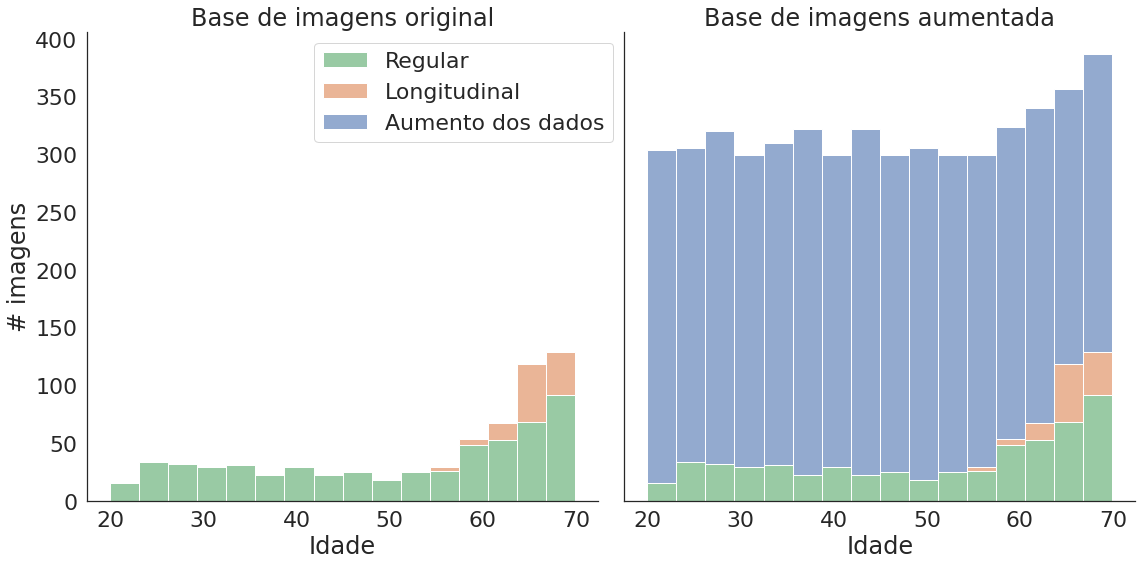

In [11]:
sns.set(context='notebook', style='white',
        font='sans-serif', font_scale=2.,
        rc={'figure.figsize': (8, 5)})

fig = plt.figure()
dt['Data_pt'] = dt[['Data']].apply(lambda x: x.replace(
    "Raw dataset", "Base de imagens original").replace("Data Augmented dataset", "Base de imagens aumentada"))
# print(dt[['Data_pt']])

g = sns.FacetGrid(dt, col="Data_pt", sharex=True,
                  height=5, size=8,
                  col_order=["Base de imagens original",
                             "Base de imagens aumentada"],
                  palette=sns.color_palette('Set2')
                  )
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='unique',
                hue_order=['Data Augmentation', 'Longitudinal', 'Regular'],
                multiple='stack', common_bins=True, bins=16,
                label='Data'
                )
g.set_xlabels("Idade")
g.set_ylabels("# imagens")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Regular', 'Longitudinal', 'Aumento dos dados']
order = [0, 1, 2]
plt.legend([handles[idx] for idx in order], [labels[idx]
                                             for idx in order], bbox_to_anchor=(0, 1))
plt.savefig('Data_augmentation_distribution_070_pt.pdf',
            bbox_inches='tight', dpi=300)


In [12]:
dt_70 = train[train.split == '>70 years'].reset_index(drop=True)
dt_70['Data'] = 'Raw dataset'
dataAug = generate_dataAugmentation(dt_70, [70,100])
dataAug = pd.concat([dataAug, dt_70])
print(dataAug.shape)
dataAug['Data'] = 'Data Augmented dataset'
dt = pd.concat([dataAug, dt_70])

25.799999999999997
(1759, 9)


In [13]:
dt

,Subject ID,Age,Research Group,Image Filename,unique,split,database,Data,Age_disc
1,100_S_4469,71.80,CN,100_S_4469_ADNI3_Initial_Visit-Cont_Pt,Data Augmentation,>70 years,ADNI,Data Augmented dataset,"[70.0, 73.225)"
2,082_S_6564,71.40,CN,082_S_6564_ADNI_Screening,Data Augmentation,>70 years,ADNI,Data Augmented dataset,"[70.0, 73.225)"
7,003_S_6259,71.40,CN,003_S_6259_ADNI_Screening,Data Augmentation,>70 years,ADNI,Data Augmented dataset,"[70.0, 73.225)"
8,009_S_4337,72.00,CN,009_S_4337_ADNI2_Screening_MRI-New_Pt,Data Augmentation,>70 years,ADNI,Data Augmented dataset,"[70.0, 73.225)"
17,100_S_6308,70.70,CN,100_S_6308_ADNI_Screening,Data Augmentation,>70 years,ADNI,Data Augmented dataset,"[70.0, 73.225)"
...,...,...,...,...,...,...,...,...,...
324,IXI605-HH-2598-T1,70.33,CN,IXI605-HH-2598-T1,Regular,>70 years,IXI,Raw dataset,"[70.0, 73.225)"
325,IXI607-Guys-1097-T1,83.81,CN,IXI607-Guys-1097-T1,Regular,>70 years,IXI,Raw dataset,"[82.9, 86.125)"
326,IXI639-Guys-1088-T1,86.20,CN,IXI639-Guys-1088-T1,Regular,>70 years,IXI,Raw dataset,"[86.125, 89.35)"
327,IXI640-Guys-1106-T1,80.80,CN,IXI640-Guys-1106-T1,Regular,>70 years,IXI,Raw dataset,"[79.675, 82.9)"


/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

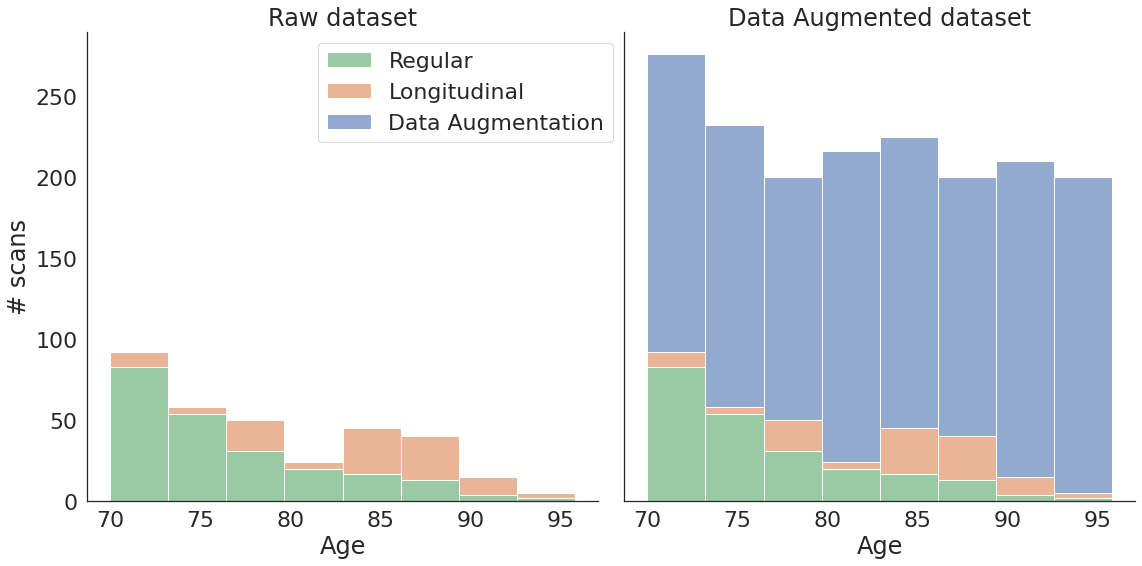

In [14]:
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=2., 
        rc={'figure.figsize':(8,5)})

fig = plt.figure()

g = sns.FacetGrid(dt, col="Data", sharex=True,
                  height=5, size=8,
                  col_order=["Raw dataset", "Data Augmented dataset"],
                  palette=sns.color_palette('Set2')
                  )
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='unique',
                hue_order=['Data Augmentation', 'Longitudinal','Regular'],
                multiple='stack', common_bins=True, bins=8,
                label='Data'
                ) 
g.set_xlabels("Age")
g.set_ylabels("# scans")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Regular', 'Longitudinal', 'Data Augmentation']
order = [0, 1, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(0, 1))
plt.savefig('Data_augmentation_distribution_maior70.pdf', bbox_inches='tight', dpi=300)


/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

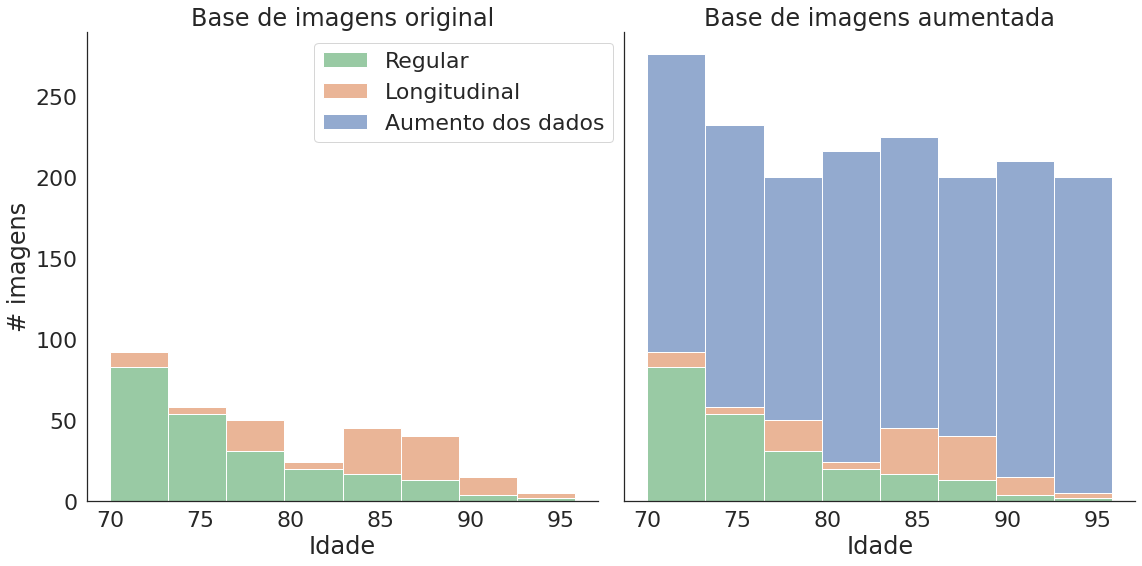

In [16]:
sns.set(context='notebook', style='white',
        font='sans-serif', font_scale=2.,
        rc={'figure.figsize': (8, 5)})

fig = plt.figure()
dt['Data_pt'] = dt[['Data']].apply(lambda x: x.replace(
    "Raw dataset", "Base de imagens original").replace("Data Augmented dataset", "Base de imagens aumentada"))

g = sns.FacetGrid(dt, col="Data_pt", sharex=True,
                  height=5, size=8,
                  col_order=["Base de imagens original",
                             "Base de imagens aumentada"],
                  palette=sns.color_palette('Set2')
                  )
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='unique',
                hue_order=['Data Augmentation', 'Longitudinal', 'Regular'],
                multiple='stack', common_bins=True, bins=8,
                label='Data'
                )
g.set_xlabels("Idade")
g.set_ylabels("# imagens")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Regular', 'Longitudinal', 'Aumento dos dados']
order = [0, 1, 2]
plt.legend([handles[idx] for idx in order], [labels[idx]
                                             for idx in order], bbox_to_anchor=(0, 1))
plt.savefig('Data_augmentation_distribution_maior70_pt.pdf',
            bbox_inches='tight', dpi=300)
